<h1 align="left">**Confidence Interval** </h1>
<br>
<img src="../images/Conf_interval.jpg" alt="Python" style="width: 200px;"/>

## Agenda for the Day
***
- Hypothesis Testing
- P-value and Confidence Interval
- Type I and Type II error

## John's Second Experiment 
***
 - Now John wants to test that if he takes 1000 houses, instead of 500, will these houses contain the Population (1460 Houses) mean too? 
 
 - He thinks that it might not contain the Population mean and if so, he'll have to take another sample of 1000. So how many times would he have to do this? 
 
 - Thanks to programming, it's easy to take many samples. But he want's to be confident that the Population Mean is contained in his samples, majority of the times. 
 
 - Confused? That's ok. John basically wants to check the confidence interval of the Mean of his many samples of 1000 houses! 


## Confidence Intervals (1/4)
***
 - A Confidence Interval is a range of values we are fairly sure our true value lies in! 
 
 - That's basically the simplest but true explanation of Confidence Interval
     ***
<center><img src="../images/ci1.gif" alt="Drawing" style="width: 200px;"/></center>

## Confidence Intervals (2/4)
***
 - Let's build our intuition with the help of an example
 
 - Example: Average Height

    - We measure the heights of 40 randomly chosen men, and get a:

            - mean height of 175cm,
            - with a standard deviation of 20cm.

## Confidence Intervals (3/4)
***
 - The 95% Confidence Interval (we will learn how to calculate this later) is:
 
 <center><img src="../images/ci2.gif" alt="Drawing" style="width: 200px;"/></center>

## Confidence Intervals (4/4)
***
- This says the true mean of ALL men's height (if we could measure their heights) is likely to be between 168.8cm and 181.2cm.

- But it might not be!

- The "95%" says that 95% of experiments like we just did will include the true mean, but 5% won't.

- So there is a 1-in-20 chance (5%) that our Confidence Interval does NOT include the true mean.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Calculating the Confidence Interval
***
Step 1: Note down the number of samples n, and calculate the mean X and standard deviation s of those samples:
***
 - Number of samples: n = 40
 - Mean: X_bar = 175
 - Standard Deviation: s = 20


***
Step 2: Decide what Confidence Interval we want. 90%, 95% and 99% are common choices. Then find the "Z" value for that Confidence Interval here:
 ***
 <center><img src="../images/ci3.png" alt="Drawing" style="width: 200px;"/></center>


***
For 95% the Z value is 1.960

Step 3: Use that Z in this formula for the Confidence Interval
 ***
 <center><img src="../images/ci4.png" alt="Drawing" style="width: 200px;"/></center>

Thus, we have: 
    
    175 ± 1.960*(20/sqrt(40))
    
    = 175cm ± 6.2cm
    
In other words: from 168.8cm to 181.2cm

 - The value after the ± is called the **margin of error**
 - The **margin of error** in the previous example is 6.20cm

## Interpretation of Confidence Intervals
***
Let's build our intution, again, with the help of another example. This should help explain how to interpret the Confidence Interval

Example: Apple Orchard

 - Are the apples big enough?

 - There are hundreds of apples on the trees, so you randomly choose just 30 and get these results:

    - Mean: 86
    - Standard Deviation: 5

***
We know:

 - X is the mean = 86
 - Z is the Z-value = 1.960 (from the table above for 95%)
 - s is the standard deviation = 5
 - n is the number of samples = 30
 - 86  ±  1.960*(5/√30) = 86 ± 1.79


So the true mean (of all the hundreds of apples) is likely to be between 84.21 and 87.79

***
True Mean

Now imagine we get to pick ALL the apples straight away, and get them ALL measured by the packing machine (this is a luxury not normally found in statistics!)

And the true mean turns out to be 84.9

Let's lay all the apples on the ground from smallest to largest:

 - Each apple is a green dot, except our samples which are blue
 ***
 <center><img src="../images/ci5.gif" alt="Drawing" style="width: 200px;"/></center> 

***
 - Our result was not exact ... it is random after all ... but the true mean is inside our confidence interval of 86 ± 1.79 (in other words 84.21 to 87.79) 
 
 - But the true mean might not be inside the confidence interval but 95% of the time it will!
 
  ### 95% of all "95% Confidence Intervals" will include the true mean


***
Maybe we had this sample, with a mean of 83.5 and a Standard Deviation of 3.5:

 - That does not include the true mean. Expect that to happen 5% of the time for a 95% confidence interval.

 - So how do we know if the sample we took is one of the "lucky" 95% or the unlucky 5%? Unless we get to measure the whole population like above we simply don't know.

- *This is the risk in sampling, we might have a bad sample.* (Important!) 
 
 - There are various Statistical techniques that are done to specifically address this issue (Discussion is beyond the scope of this lecture) 

## We should try and keep it real but laziness..

***
 <center><img src="../images/ci_meme.jpg" alt="Drawing" style="width: 600px;"/></center> 

## Coming Back to John's Experiment 
***
 - John decides to carry out the experiment to see whether the houses do have the True Mean within the sample! 

 - Let's get right into it!

In [6]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import math

data = pd.read_csv("../train.csv")
data.head()

np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= data['SalePrice'], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = data['SalePrice'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:
1.6448536269514722
Confidence interval:
(178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


* Notice that the true mean is contained in our interval.
* A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our sample's confidence intervals will contain the true population mean.


## John's Experiment - Continued
***
* Now, instead of 1, John creates several confidence intervals and plots them to get a better sense of what it means to "capture" the true mean

* He does this for 25 trials! 

* Let's check out what he got

In [7]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = data['SalePrice'].std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

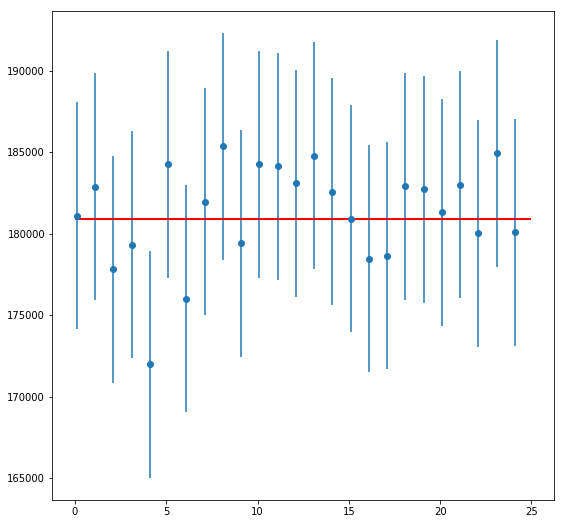

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")

### Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the times.

# Thank You
***
For more queries - Please visit https://seekho.ai 